In [1]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.lines import Line2D

# Internal imports

In [2]:
# set plot style
%matplotlib widget
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

# set equation colors
c_ex = 'k'
c_dis = "#d65d17ff"
c_max = "#57db2fff"
c_mf = "#14b7ccff"

#### vGM - SAND

In [3]:
# load data
df = pd.read_csv('exp5_vGM_SAND/rel_error.csv', index_col=0)
idx = np.logical_and(df['unsaturated'], df['clogged'])

print(f"Fraction of unsaturated configurations: {df['unsaturated'].mean():.2f}")
print(f"Fraction of clogged configurations: {df['clogged'].mean():.2f}")
print(f"Fraction of configurations with vanishing capillary zone: " \
      f"{df['van_cap_zone'].mean():.2f}")
print(f"Fraction of valid (unsaturated and clogged) configurations: " \
      f"{idx.mean():.2f}")

df = df.loc[idx]

Fraction of unsaturated configurations: 0.99
Fraction of clogged configurations: 1.00
Fraction of configurations with vanishing capillary zone: 0.00
Fraction of valid (unsaturated and clogged) configurations: 0.99


/tmp/ipykernel_78020/728675162.py:184: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


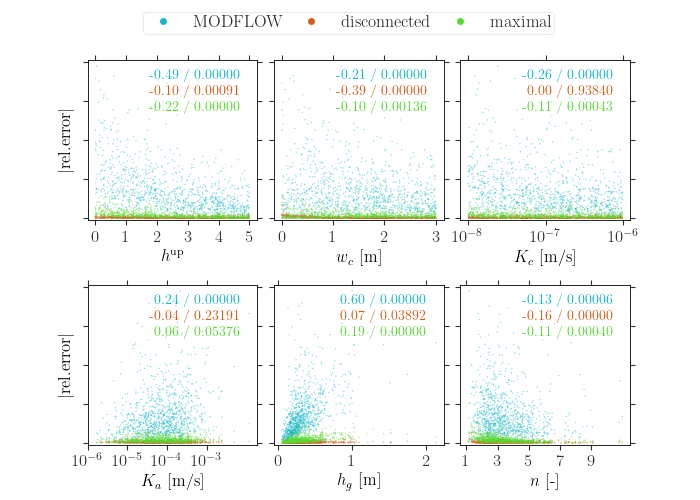

In [4]:
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.1)
axs = gs.subplots(sharex=False, sharey=True)


y1 = np.abs(df['rel_err_mf'].values)
y2 = np.abs(df['rel_err_dis'].values)
y3 = np.abs(df['rel_err_max'].values)

# stage
i1, i2 = 0, 0
x = df['stage'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$h^\\mathrm{{up}}$', fontsize=12)
axs[i1, i2].set_ylabel('$|\\mathrm{{rel. error}}|$', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3, 4, 5])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# clogging thickness
i1, i2 = 0, 1
x = df['cl_th'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$w_c$ [m]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# clogging conductivity
i1, i2 = 0, 2
x = np.log10(df['cl_cond'].values)
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$K_c$ [m/s]', fontsize=12)
axs[i1, i2].set_xticks([-8, -7, -6], labels=['$10^{-8}$', '$10^{-7}$',
                                             '$10^{-6}$'])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# aquifer conductivity
i1, i2 = 1, 0
x = np.log10(df['aq_cond'].values)
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$K_a$ [m/s]', fontsize=12)
axs[i1, i2].set_ylabel('$|\\mathrm{{rel. error}}|$', fontsize=12)
axs[i1, i2].set_xticks([-6, -5, -4, -3], labels=['$10^{-6}$', '$10^{-5}$',
                                                 '$10^{-4}$', '$10^{-3}$'])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# aquifer scale
i1, i2 = 1, 1
x = df['aq_scale'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$h_g$ [m]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)


# aquifer shape
i1, i2 = 1, 2
x = df['aq_shape'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$n$ [-]', fontsize=12)
axs[i1, i2].set_xticks([1, 3, 5, 7, 9])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)


for ax in axs.flatten():
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.minorticks_off()



legend = [Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_mf,
                 markeredgecolor='None', label='MODFLOW'),
          Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_dis,
                 markeredgecolor='None', label='disconnected'),
          Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_max,
                 markeredgecolor='None', label='maximal')]
plt.legend(handles=legend, bbox_to_anchor=(0, 2.7, 0.6, 0.05), fontsize=12,
           ncols=3, columnspacing=0.7)


plt.tight_layout()
plt.savefig(output_path / 'rel_error_correlation_vGM_SAND.pdf')

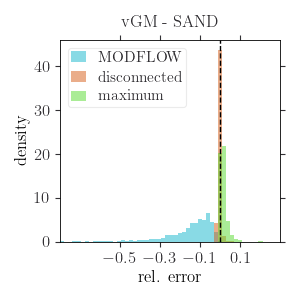

In [5]:
fig, ax = plt.subplots(figsize=(3, 3))


n_bins = 100
bins = np.linspace(-1, 1, n_bins)

hist, bins = np.histogram(df['rel_err_mf'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_mf, alpha=0.5, label='MODFLOW')

hist, bins = np.histogram(df['rel_err_dis'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_dis, alpha=0.5, label='disconnected')

hist, bins = np.histogram(df['rel_err_max'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_max, alpha=0.5, label='maximum')

ax.axvline(0.0, ls='--', c='k', lw=1)

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.minorticks_off()
ax.set_xlim(xmin=-0.8, xmax=0.3)
ax.set_xticks([-0.5, -0.3, -0.1, 0.1])
ax.set_xlabel('rel. error', fontsize=12)
ax.set_ylabel('density', fontsize=12)

plt.title('vGM - SAND', fontsize=12, loc='center', pad=10)
plt.legend(loc='upper left', fontsize=11, handlelength=1)
plt.tight_layout()
plt.savefig(output_path / 'rel_error_density_vGM_SAND.pdf')

#### vGM - SAND_LOAM

In [6]:
# load data
df = pd.read_csv('exp5_vGM_SAND_LOAM/rel_error.csv', index_col=0)
idx = np.logical_and(df['unsaturated'], df['clogged'])

print(f"Fraction of unsaturated configurations: {df['unsaturated'].mean():.2f}")
print(f"Fraction of clogged configurations: {df['clogged'].mean():.2f}")
print(f"Fraction of configurations with vanishing capillary zone: " \
      f"{df['van_cap_zone'].mean():.2f}")
print(f"Fraction of valid (unsaturated and clogged) configurations: " \
      f"{idx.mean():.2f}")

df = df.loc[idx]

Fraction of unsaturated configurations: 0.88
Fraction of clogged configurations: 0.97
Fraction of configurations with vanishing capillary zone: 0.17
Fraction of valid (unsaturated and clogged) configurations: 0.88


/tmp/ipykernel_78020/2287028991.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


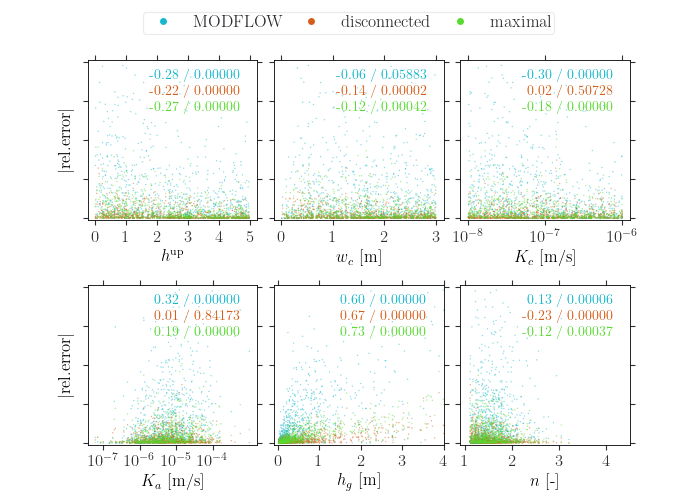

In [7]:
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.1)
axs = gs.subplots(sharex=False, sharey=True)


y1 = np.abs(df['rel_err_mf'].values)
y2 = np.abs(df['rel_err_dis'].values)
y3 = np.abs(df['rel_err_max'].values)

# stage
i1, i2 = 0, 0
x = df['stage'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$h^\\mathrm{{up}}$', fontsize=12)
axs[i1, i2].set_ylabel('$|\\mathrm{{rel. error}}|$', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3, 4, 5])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# clogging thickness
i1, i2 = 0, 1
x = df['cl_th'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$w_c$ [m]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# clogging conductivity
i1, i2 = 0, 2
x = np.log10(df['cl_cond'].values)
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$K_c$ [m/s]', fontsize=12)
axs[i1, i2].set_xticks([-8, -7, -6], labels=['$10^{-8}$', '$10^{-7}$',
                                             '$10^{-6}$'])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# aquifer conductivity
i1, i2 = 1, 0
x = np.log10(df['aq_cond'].values)
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$K_a$ [m/s]', fontsize=12)
axs[i1, i2].set_ylabel('$|\\mathrm{{rel. error}}|$', fontsize=12)
axs[i1, i2].set_xticks([-7, -6, -5, -4], labels=['$10^{-7}$', '$10^{-6}$',
                                                 '$10^{-5}$', '$10^{-4}$'])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# aquifer scale
i1, i2 = 1, 1
x = df['aq_scale'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$h_g$ [m]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3, 4])
axs[i1, i2].set_xlim(xmin=-0.1, xmax=4)
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)


# aquifer shape
i1, i2 = 1, 2
x = df['aq_shape'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$n$ [-]', fontsize=12)
axs[i1, i2].set_xticks([1, 2, 3, 4])
axs[i1, i2].set_xlim(xmin=0.9, xmax=4.5)
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)


for ax in axs.flatten():
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.minorticks_off()



legend = [Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_mf,
                 markeredgecolor='None', label='MODFLOW'),
          Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_dis,
                 markeredgecolor='None', label='disconnected'),
          Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_max,
                 markeredgecolor='None', label='maximal')]
plt.legend(handles=legend, bbox_to_anchor=(0, 2.7, 0.6, 0.05), fontsize=12,
           ncols=3, columnspacing=0.7)


plt.tight_layout()
plt.savefig(output_path / 'rel_error_correlation_vGM_SAND_LOAM.pdf')

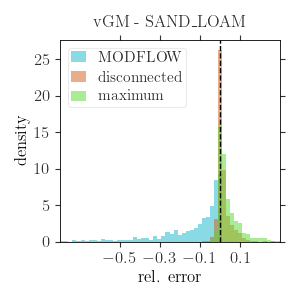

In [8]:
fig, ax = plt.subplots(figsize=(3, 3))


n_bins = 100
bins = np.linspace(-1, 1, n_bins)

hist, bins = np.histogram(df['rel_err_mf'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_mf, alpha=0.5, label='MODFLOW')

hist, bins = np.histogram(df['rel_err_dis'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_dis, alpha=0.5, label='disconnected')

hist, bins = np.histogram(df['rel_err_max'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_max, alpha=0.5, label='maximum')

ax.axvline(0.0, ls='--', c='k', lw=1)

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.minorticks_off()
ax.set_xlim(xmin=-0.8, xmax=0.3)
ax.set_xticks([-0.5, -0.3, -0.1, 0.1])
ax.set_xlabel('rel. error', fontsize=12)
ax.set_ylabel('density', fontsize=12)

plt.title('vGM - SAND_LOAM', fontsize=12, loc='center', pad=10)
plt.legend(loc='upper left', fontsize=11, handlelength=1)
plt.tight_layout()
plt.savefig(output_path / 'rel_error_density_vGM_SAND_LOAM.pdf')

#### BCB - SAND

In [9]:
# load data
df = pd.read_csv('exp5_BCB_SAND/rel_error.csv', index_col=0)
idx = np.logical_and(df['unsaturated'], df['clogged'])

print(f"Fraction of unsaturated configurations: {df['unsaturated'].mean():.2f}")
print(f"Fraction of clogged configurations: {df['clogged'].mean():.2f}")
print(f"Fraction of configurations with vanishing capillary zone: " \
      f"{df['van_cap_zone'].mean():.2f}")
print(f"Fraction of valid (unsaturated and clogged) configurations: " \
      f"{idx.mean():.2f}")

df = df.loc[idx]

Fraction of unsaturated configurations: 1.00
Fraction of clogged configurations: 1.00
Fraction of configurations with vanishing capillary zone: 0.00
Fraction of valid (unsaturated and clogged) configurations: 1.00


/tmp/ipykernel_78020/643301452.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


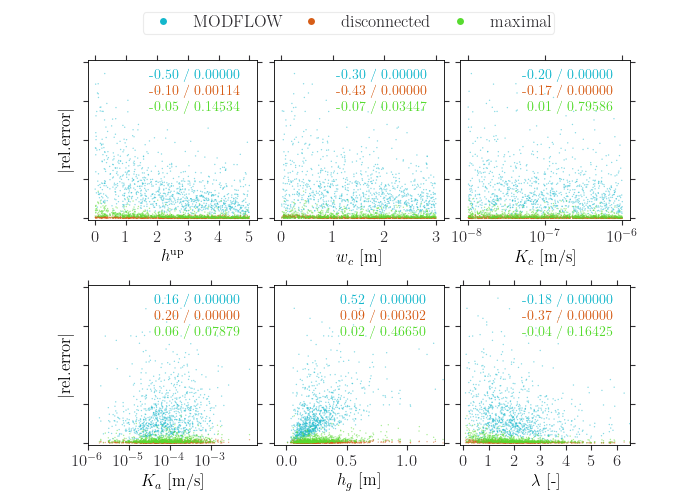

In [10]:
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.1)
axs = gs.subplots(sharex=False, sharey=True)


y1 = np.abs(df['rel_err_mf'].values)
y2 = np.abs(df['rel_err_dis'].values)
y3 = np.abs(df['rel_err_max'].values)

# stage
i1, i2 = 0, 0
x = df['stage'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$h^\\mathrm{{up}}$', fontsize=12)
axs[i1, i2].set_ylabel('$|\\mathrm{{rel. error}}|$', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3, 4, 5])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# clogging thickness
i1, i2 = 0, 1
x = df['cl_th'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$w_c$ [m]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# clogging conductivity
i1, i2 = 0, 2
x = np.log10(df['cl_cond'].values)
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$K_c$ [m/s]', fontsize=12)
axs[i1, i2].set_xticks([-8, -7, -6], labels=['$10^{-8}$', '$10^{-7}$',
                                             '$10^{-6}$'])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# aquifer conductivity
i1, i2 = 1, 0
x = np.log10(df['aq_cond'].values)
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$K_a$ [m/s]', fontsize=12)
axs[i1, i2].set_ylabel('$|\\mathrm{{rel. error}}|$', fontsize=12)
axs[i1, i2].set_xticks([-6, -5, -4, -3], labels=['$10^{-6}$', '$10^{-5}$',
                                                 '$10^{-4}$', '$10^{-3}$'])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# aquifer scale
i1, i2 = 1, 1
x = df['aq_scale'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$h_g$ [m]', fontsize=12)
axs[i1, i2].set_xticks([0, 0.5, 1])
axs[i1, i2].set_xlim(xmin=-0.1, xmax=1.3)
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)


# aquifer shape
i1, i2 = 1, 2
x = df['aq_shape'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$\\lambda$ [-]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3, 4, 5, 6])
axs[i1, i2].set_xlim(xmin=-0.1, xmax=6.5)
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)


for ax in axs.flatten():
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.minorticks_off()



legend = [Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_mf,
                 markeredgecolor='None', label='MODFLOW'),
          Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_dis,
                 markeredgecolor='None', label='disconnected'),
          Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_max,
                 markeredgecolor='None', label='maximal')]
plt.legend(handles=legend, bbox_to_anchor=(0, 2.7, 0.6, 0.05), fontsize=12,
           ncols=3, columnspacing=0.7)


plt.tight_layout()
plt.savefig(output_path / 'rel_error_correlation_BCB_SAND.pdf')

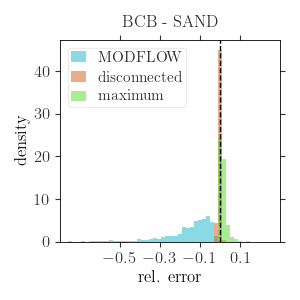

In [11]:
fig, ax = plt.subplots(figsize=(3, 3))


n_bins = 100
bins = np.linspace(-1, 1, n_bins)

hist, bins = np.histogram(df['rel_err_mf'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_mf, alpha=0.5, label='MODFLOW')

hist, bins = np.histogram(df['rel_err_dis'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_dis, alpha=0.5, label='disconnected')

hist, bins = np.histogram(df['rel_err_max'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_max, alpha=0.5, label='maximum')

ax.axvline(0.0, ls='--', c='k', lw=1)

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.minorticks_off()
ax.set_xlim(xmin=-0.8, xmax=0.3)
ax.set_xticks([-0.5, -0.3, -0.1, 0.1])
ax.set_xlabel('rel. error', fontsize=12)
ax.set_ylabel('density', fontsize=12)

plt.title('BCB - SAND', fontsize=12, loc='center', pad=10)
plt.legend(loc='upper left', fontsize=11, handlelength=1)
plt.tight_layout()
plt.savefig(output_path / 'rel_error_density_BCB_SAND.pdf')

### BCB - SAND_LOAM

In [12]:
# load data
df = pd.read_csv('exp5_BCB_SAND_LOAM/rel_error.csv', index_col=0)
idx = np.logical_and(df['unsaturated'], df['clogged'])

print(f"Fraction of unsaturated configurations: {df['unsaturated'].mean():.2f}")
print(f"Fraction of clogged configurations: {df['clogged'].mean():.2f}")
print(f"Fraction of configurations with vanishing capillary zone: " \
      f"{df['van_cap_zone'].mean():.2f}")
print(f"Fraction of valid (unsaturated and clogged) configurations: " \
      f"{idx.mean():.2f}")

df = df.loc[idx]

Fraction of unsaturated configurations: 0.89
Fraction of clogged configurations: 0.97
Fraction of configurations with vanishing capillary zone: 0.04
Fraction of valid (unsaturated and clogged) configurations: 0.89


/tmp/ipykernel_78020/1295992626.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


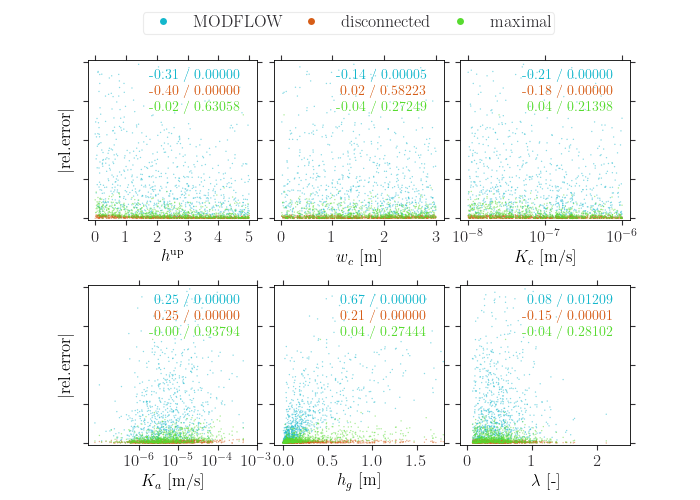

In [13]:
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.1)
axs = gs.subplots(sharex=False, sharey=True)


y1 = np.abs(df['rel_err_mf'].values)
y2 = np.abs(df['rel_err_dis'].values)
y3 = np.abs(df['rel_err_max'].values)

# stage
i1, i2 = 0, 0
x = df['stage'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$h^\\mathrm{{up}}$', fontsize=12)
axs[i1, i2].set_ylabel('$|\\mathrm{{rel. error}}|$', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3, 4, 5])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# clogging thickness
i1, i2 = 0, 1
x = df['cl_th'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$w_c$ [m]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2, 3])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# clogging conductivity
i1, i2 = 0, 2
x = np.log10(df['cl_cond'].values)
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$K_c$ [m/s]', fontsize=12)
axs[i1, i2].set_xticks([-8, -7, -6], labels=['$10^{-8}$', '$10^{-7}$',
                                             '$10^{-6}$'])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# aquifer conductivity
i1, i2 = 1, 0
x = np.log10(df['aq_cond'].values)
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$K_a$ [m/s]', fontsize=12)
axs[i1, i2].set_ylabel('$|\\mathrm{{rel. error}}|$', fontsize=12)
axs[i1, i2].set_xticks([-6, -5, -4, -3], labels=['$10^{-6}$', '$10^{-5}$',
                                                 '$10^{-4}$', '$10^{-3}$'])
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)

# aquifer scale
i1, i2 = 1, 1
x = df['aq_scale'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$h_g$ [m]', fontsize=12)
axs[i1, i2].set_xticks([0, 0.5, 1, 1.5])
axs[i1, i2].set_xlim(xmin=-0.1, xmax=1.8)
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)


# aquifer shape
i1, i2 = 1, 2
x = df['aq_shape'].values
axs[i1, i2].scatter(x, y1, c=c_mf, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y2, c=c_dis, s=1, alpha=0.5, ec='None')
axs[i1, i2].scatter(x, y3, c=c_max, s=1, alpha=0.5, ec='None')

p1 = stats.pearsonr(x, y1)
axs[i1, i2].text(0.9, 0.9, f'{p1.statistic:.2f} / {p1.pvalue:.5f}', c=c_mf,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p2 = stats.pearsonr(x, y2)
axs[i1, i2].text(0.9, 0.8, f'{p2.statistic:.2f} / {p2.pvalue:.5f}', c=c_dis,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')
p3 = stats.pearsonr(x, y3)
axs[i1, i2].text(0.9, 0.7, f'{p3.statistic:.2f} / {p3.pvalue:.5f}', c=c_max,
                transform = axs[i1, i2].transAxes,
                horizontalalignment='right', verticalalignment='center')

axs[i1, i2].set_xlabel('$\\lambda$ [-]', fontsize=12)
axs[i1, i2].set_xticks([0, 1, 2])
axs[i1, i2].set_xlim(xmin=-0.1, xmax=2.5)
axs[i1, i2].set_yticks([0, 0.2, 0.4, 0.6, 0.8], labels=[])
axs[i1, i2].set_ylim(ymin=-0.01, ymax=0.81)


for ax in axs.flatten():
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.tick_params(top=True, right=True)
    ax.minorticks_off()



legend = [Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_mf,
                 markeredgecolor='None', label='MODFLOW'),
          Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_dis,
                 markeredgecolor='None', label='disconnected'),
          Line2D([0], [0], ls='None', marker='o', ms=5, markerfacecolor=c_max,
                 markeredgecolor='None', label='maximal')]
plt.legend(handles=legend, bbox_to_anchor=(0, 2.7, 0.6, 0.05), fontsize=12,
           ncols=3, columnspacing=0.7)


plt.tight_layout()
plt.savefig(output_path / 'rel_error_correlation_BCB_SAND_LOAM.pdf')

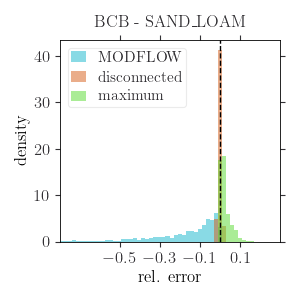

In [14]:
fig, ax = plt.subplots(figsize=(3, 3))


n_bins = 100
bins = np.linspace(-1, 1, n_bins)

hist, bins = np.histogram(df['rel_err_mf'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_mf, alpha=0.5, label='MODFLOW')

hist, bins = np.histogram(df['rel_err_dis'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_dis, alpha=0.5, label='disconnected')

hist, bins = np.histogram(df['rel_err_max'].values, bins=bins, density=True)
ax.stairs(hist, bins, fill=True, color=c_max, alpha=0.5, label='maximum')

ax.axvline(0.0, ls='--', c='k', lw=1)

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.minorticks_off()
ax.set_xlim(xmin=-0.8, xmax=0.3)
ax.set_xticks([-0.5, -0.3, -0.1, 0.1])
ax.set_xlabel('rel. error', fontsize=12)
ax.set_ylabel('density', fontsize=12)

plt.title('BCB - SAND_LOAM', fontsize=12, loc='center', pad=10)
plt.legend(loc='upper left', fontsize=11, handlelength=1)
plt.tight_layout()
plt.savefig(output_path / 'rel_error_density_BCB_SAND_LOAM.pdf')